<a href="https://colab.research.google.com/github/kamran-py/regressions/blob/master/EmpEx17_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scipy xlrd

In [2]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 8.2 MB/s eta 0:00:00


In [3]:
pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 13.0 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as sst
import math

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

#  import for the ols modeling
#
from statsmodels.formula.api import ols
#
#  Import for the two-stage leaset squares modeling
#
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics import tsaplots

In [5]:
Ch17data = pd.read_excel('/content/us_macro_quarterly.xlsx')
print(Ch17data)

          freq      GDPC1    JAPAN_IP  PCECTPI    CPIAUCSL
0   1955-01-01   2683.766         NaN   15.755   26.793333
1   1955-04-01   2727.452         NaN   15.771   26.756667
2   1955-07-01   2764.128         NaN   15.834   26.776667
3   1955-10-01   2780.762         NaN   15.878   26.856667
4   1956-01-01   2770.032         NaN   15.943   26.860000
..         ...        ...         ...      ...         ...
247 2016-10-01  16851.420   99.125073  111.583  242.177333
248 2017-01-01  16903.240   99.291726  112.198  243.949000
249 2017-04-01  17031.085  101.324890  112.273  244.010000
250 2017-07-01  17163.894  101.724856  112.699  245.296667
251 2017-10-01  17271.702  103.491376  113.458  247.301333

[252 rows x 5 columns]


In [6]:
Ch17data['l1_GDPC1'] = Ch17data['GDPC1'].shift(1)
Ch17data['GDPGR']=400*(np.log(Ch17data['GDPC1'])-np.log(Ch17data['l1_GDPC1']))
print(Ch17data)

          freq      GDPC1    JAPAN_IP  PCECTPI    CPIAUCSL   l1_GDPC1  \
0   1955-01-01   2683.766         NaN   15.755   26.793333        NaN   
1   1955-04-01   2727.452         NaN   15.771   26.756667   2683.766   
2   1955-07-01   2764.128         NaN   15.834   26.776667   2727.452   
3   1955-10-01   2780.762         NaN   15.878   26.856667   2764.128   
4   1956-01-01   2770.032         NaN   15.943   26.860000   2780.762   
..         ...        ...         ...      ...         ...        ...   
247 2016-10-01  16851.420   99.125073  111.583  242.177333  16778.148   
248 2017-01-01  16903.240   99.291726  112.198  243.949000  16851.420   
249 2017-04-01  17031.085  101.324890  112.273  244.010000  16903.240   
250 2017-07-01  17163.894  101.724856  112.699  245.296667  17031.085   
251 2017-10-01  17271.702  103.491376  113.458  247.301333  17163.894   

        GDPGR  
0         NaN  
1    6.458723  
2    5.342950  
3    2.399911  
4   -1.546447  
..        ...  
247  1.7430

In [7]:
from arch.univariate import ARX
ar = ARX(Ch17data['GDPGR'][1:251], lags=2)
print(ar.fit().summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:                  GDPGR   R-squared:                       0.120
Mean Model:                        AR   Adj. R-squared:                  0.113
Vol Model:          Constant Variance   Log-Likelihood:               -643.671
Distribution:                  Normal   AIC:                           1295.34
Method:            Maximum Likelihood   BIC:                           1309.40
                                        No. Observations:                  248
Date:                Sun, Dec 21 2025   Df Residuals:                      245
Time:                        02:38:04   Df Model:                            3
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const          1.7564      0.370      4.750  2.034e-06    [  

In [8]:
from arch.univariate import ARCH, GARCH
ar.volatility = GARCH(p=1,q=1)
#ar.volatility = ARCH(p=1)
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                  GDPGR   R-squared:                       0.111
Mean Model:                        AR   Adj. R-squared:                  0.103
Vol Model:                      GARCH   Log-Likelihood:               -620.751
Distribution:                  Normal   AIC:                           1253.50
Method:            Maximum Likelihood   BIC:                           1274.58
                                        No. Observations:                  248
Date:                Sun, Dec 21 2025   Df Residuals:                      245
Time:                        02:38:10   Df Model:                            3
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          1.5647      0.255      6.127  8.962e-10   [  1.06

In [9]:
Coef=res.params
Coef

,params
Const,1.564655
GDPGR[1],0.302721
GDPGR[2],0.195896
omega,0.402603
alpha[1],0.209353
beta[1],0.765606


In [12]:
# compute deviations of the GDPGR from their mean
dev_mean_GDPGR=Ch17data['GDPGR'][1:251]-Coef[0]

upper_bound=Coef[0]+res.conditional_volatility
lower_bound=Coef[0]-res.conditional_volatility

/tmp/ipython-input-2348574056.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dev_mean_GDPGR=Ch17data['GDPGR'][1:251]-Coef[0]
/tmp/ipython-input-2348574056.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  upper_bound=Coef[0]+res.conditional_volatility
/tmp/ipython-input-2348574056.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lower_bound=Coef[0]-res.conditional_volatility


Text(0, 0.5, 'Percent')

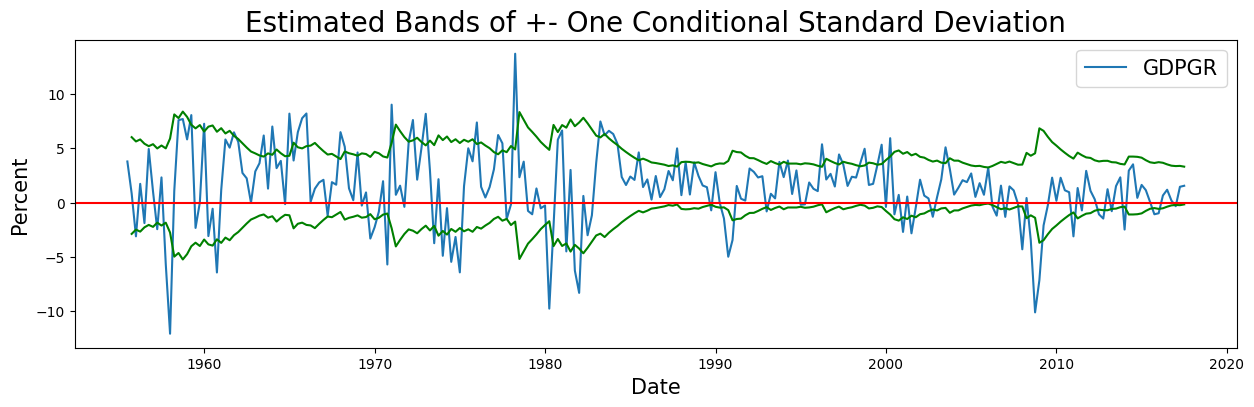

In [13]:
plt.figure(figsize=(15,4))
plt.plot(Ch17data['freq'][2:251],dev_mean_GDPGR[1:251])
plt.plot(Ch17data['freq'][2:251],upper_bound[1:251],color='g', linestyle='-')
plt.plot(Ch17data['freq'][2:251],lower_bound[1:251],color='g', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Estimated Bands of +- One Conditional Standard Deviation',fontsize=20)
plt.legend(['GDPGR'],fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Percent",fontsize=15)

In [14]:
# forecast the test set

from matplotlib import pyplot

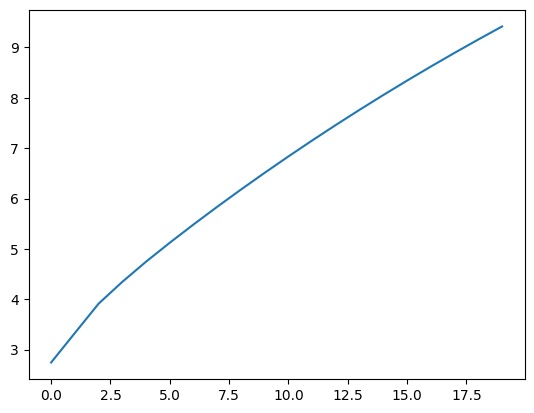

In [15]:
forecast = res.forecast(horizon=20)
pyplot.plot(forecast.variance.values[-1, :])
pyplot.show()